In [1]:
from tensorflow.keras import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import keras.utils as image 
from sklearn.model_selection import train_test_split

In [2]:
imgDirectory = "C:\\Users\\moebo\\pcd\\data\\"

In [3]:
df = pd.read_csv('data.csv')

In [4]:
size = 224
xDataset = []

for i in tqdm(range(df.shape[0])):
    img = image.load_img(imgDirectory + df['img'][i] , target_size=(size,size,3))
    img = image.img_to_array(img)
    img = preprocess_input(img)
    xDataset.append(img)

100%|██████████| 8286/8286 [00:49<00:00, 166.19it/s]


In [5]:
x = np.array(xDataset)

In [6]:
y = np.array(df.drop(['path','img'], axis=1))
y.shape
y

array([[2],
       [2],
       [2],
       ...,
       [3],
       [3],
       [3]], dtype=int64)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20, test_size=0.2)

In [8]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

a = base_model.output
a = GlobalAveragePooling2D()(a)
pred = Dense(512, activation='relu')(a)
pred = Dense(256, activation='relu')(a)
pred = Dense(128, activation='relu')(a)

pred = Dense(5, activation='softmax')(a)

model = Model(inputs=base_model.input, outputs=pred)

In [12]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [9]:
for layers in model.layers[:-5]:
    layers.trainable = False

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [10]:
epochs = 10

optimizer = Adam(learning_rate=0.0001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)

Epoch 1/10
208/208 [==============================] - 73s 322ms/step - loss: 0.5299 - accuracy: 0.8111 - val_loss: 0.4667 - val_accuracy: 0.8492
Epoch 2/10
208/208 [==============================] - 65s 311ms/step - loss: 0.3098 - accuracy: 0.8950 - val_loss: 0.4090 - val_accuracy: 0.8673
Epoch 3/10
208/208 [==============================] - 65s 313ms/step - loss: 0.2338 - accuracy: 0.9237 - val_loss: 0.3685 - val_accuracy: 0.8818
Epoch 4/10
208/208 [==============================] - 65s 314ms/step - loss: 0.1927 - accuracy: 0.9406 - val_loss: 0.3428 - val_accuracy: 0.8890
Epoch 5/10
208/208 [==============================] - 75s 359ms/step - loss: 0.1659 - accuracy: 0.9520 - val_loss: 0.3318 - val_accuracy: 0.8908
Epoch 6/10
208/208 [==============================] - 67s 325ms/step - loss: 0.1384 - accuracy: 0.9623 - val_loss: 0.3194 - val_accuracy: 0.8993
Epoch 7/10
208/208 [==============================] - 67s 321ms/step - loss: 0.1157 - accuracy: 0.9721 - val_loss: 0.3194 - val_ac

In [11]:
pred = model.predict(x_test)

52/52 [==============================] - 13s 238ms/step


In [13]:
minipred = pred[:5]

In [14]:
y_pred = [np.argmax(element) for element in minipred]
y_pred

[4, 0, 1, 0, 2]

In [15]:
y_test[:5]

array([[4],
       [0],
       [1],
       [0],
       [2]], dtype=int64)

In [16]:
class_names=["tshirt", "dress", "pants", "skirt", "footwear"]


In [25]:
y_pred = [np.argmax(element) for element in pred]

In [30]:
y_pred

[4,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 3,
 4,
 2,
 3,
 4,
 0,
 3,
 1,
 3,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 2,
 0,
 3,
 4,
 0,
 4,
 4,
 4,
 3,
 1,
 2,
 1,
 2,
 3,
 4,
 1,
 1,
 4,
 4,
 3,
 2,
 4,
 0,
 0,
 2,
 2,
 0,
 0,
 4,
 1,
 4,
 4,
 1,
 4,
 4,
 1,
 2,
 0,
 2,
 3,
 4,
 3,
 2,
 4,
 2,
 2,
 2,
 4,
 0,
 1,
 2,
 3,
 4,
 4,
 4,
 1,
 4,
 2,
 4,
 0,
 0,
 3,
 1,
 1,
 4,
 1,
 1,
 2,
 1,
 1,
 1,
 4,
 3,
 1,
 2,
 1,
 3,
 2,
 3,
 0,
 1,
 2,
 1,
 3,
 2,
 3,
 0,
 3,
 3,
 0,
 3,
 4,
 4,
 4,
 4,
 4,
 0,
 1,
 4,
 2,
 3,
 3,
 4,
 2,
 0,
 1,
 3,
 4,
 3,
 2,
 1,
 2,
 1,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 4,
 3,
 2,
 3,
 4,
 4,
 2,
 3,
 0,
 1,
 3,
 3,
 1,
 3,
 1,
 4,
 4,
 1,
 3,
 4,
 4,
 2,
 3,
 0,
 3,
 0,
 2,
 1,
 4,
 0,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 1,
 4,
 4,
 3,
 2,
 3,
 4,
 2,
 1,
 4,
 0,
 3,
 4,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 2,
 2,
 1,
 2,
 3,
 3,
 3,
 0,
 0,
 3,
 1,
 0,
 4,
 2,
 4,
 0,
 3,
 4,
 3,
 3,
 0,
 0,
 2,
 1,
 3,
 4,
 2,
 0,
 0,
 4,
 3,
 4,
 1,
 3,
 4,
 1,
 2,
 4,
 2,
 0,
 0,
 0,
 1,
 3,
 1,


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PREDICTED: dress
EXPECTED : skirt


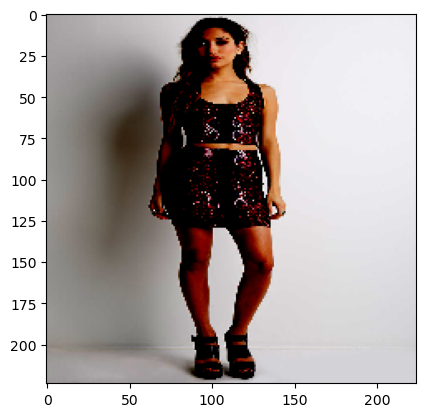

In [51]:
print("PREDICTED: " + class_names[y_pred[1234]] + "\nEXPECTED : " + class_names[y_test[1234][0]])
plt.imshow(x_test[1234])